<a href="https://colab.research.google.com/github/Bharathjpv/Loan-Approval-Status/blob/main/Loan_Approval_status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Upload data to the google colab notebook

In [ ]:
from google.colab import files
Uploaded = files.upload()

Saving LoanData.csv to LoanData.csv


# Ignore the warnigs

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Import the libraries needed

In [ ]:
import pandas as pd

# Pre-Processing of the Data

In [ ]:
# Read the loan data
LoanData = pd.read_csv('LoanData.csv')

In [ ]:
# creat a copy of the data
Loan_prep = LoanData.copy()

In [ ]:
# check for the null values
Loan_prep.isnull().sum(axis=0)

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

In [ ]:
# There are few missing values
# Drop the rows with missing values
Loan_prep = Loan_prep.dropna()
Loan_prep.isnull().sum(axis = 0)

gender     0
married    0
ch         0
income     0
loanamt    0
status     0
dtype: int64

In [ ]:
# Drop the irrlevent columns
Loan_prep = Loan_prep.drop(['gender'], axis=1)

In [ ]:
Loan_prep.dtypes

married     object
ch         float64
income       int64
loanamt    float64
status      object
dtype: object

In [ ]:
# get dummy variables for categorical columns
Loan_prep = pd.get_dummies(Loan_prep, drop_first=True)

In [ ]:
# normalize the data for loan amount and income using Standard scalar

from sklearn.preprocessing import StandardScaler
scalar_ = StandardScaler()
Loan_prep['income'] = scalar_.fit_transform(Loan_prep[['income']])
Loan_prep['loanamt'] = scalar_.fit_transform(Loan_prep[['loanamt']])

In [ ]:
Loan_prep.head(10)

,ch,income,loanamt,married_Yes,status_Y
1,1.0,-0.128073,-0.194250,1,0
2,1.0,-0.392077,-0.971015,1,1
3,1.0,-0.461621,-0.294478,1,1
4,1.0,0.108246,-0.031380,0,1
5,1.0,0.011017,1.547205,1,1
6,1.0,-0.503315,-0.607689,1,1
7,0.0,-0.386073,0.181603,1,0
8,1.0,-0.224302,0.306888,1,1
9,1.0,1.249148,2.574538,1,0
10,1.0,-0.358722,-0.920901,1,1


In [ ]:
# Create dependent and independent variable
Y = Loan_prep['status_Y']
X = Loan_prep.drop(['status_Y'], axis=1)

In [ ]:
# split the data into Test and Train Data set
# Statify the data so that train and test data sets have resonable numbers of both approved and non-approved enteties( to avoid the impbalance split)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1234, stratify = Y)

# Model Bilding

In [ ]:
# Import the logistic regression and create an instance of it

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
# fit the model (train the model)

lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predict the outcome using Test data
Y_predict = lr.predict(X_test)

In [ ]:
# Build a confusion matric and get the accuracy score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_predict)
score = lr.score(X_test, Y_test)
print(cm)
print(score)

[[ 29  20]
 [  2 108]]
0.8616352201257862


In [ ]:
# Build a classification report
from sklearn.metrics import classification_report
cr = classification_report(Y_test, Y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.59      0.72        49
           1       0.84      0.98      0.91       110

    accuracy                           0.86       159
   macro avg       0.89      0.79      0.82       159
weighted avg       0.87      0.86      0.85       159



In [ ]:
# We need to improve the accuracy
# Get the probabilities of he prediction

Y_prob = lr.predict_proba(X_test)[:,1]
Y_prob

In [ ]:
# Predictions based on probability threshold

Y_new_pred = []
threshold = 0.8

for i in range(0, len(Y_prob)):
  if Y_prob[i] > threshold:
    Y_new_pred.append(1)
  else:
    Y_new_pred.append(0)

In [ ]:
from sklearn.metrics import accuracy_score
cm_th = confusion_matrix(Y_test, Y_new_pred)
score_th = accuracy_score(Y_test, Y_new_pred)

cr_th = classification_report(Y_test, Y_new_pred)

print(cm_th)
print(score_th)
print(cr_th)

[[46  3]
 [60 50]]
0.6037735849056604
              precision    recall  f1-score   support

           0       0.43      0.94      0.59        49
           1       0.94      0.45      0.61       110

    accuracy                           0.60       159
   macro avg       0.69      0.70      0.60       159
weighted avg       0.79      0.60      0.61       159



In [ ]:
# Get the AUC and plot the curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(Y_test, Y_prob)
AUC = roc_auc_score(Y_test, Y_prob)
print(fpr)
print(tpr)
print(threshold)
print(AUC)

[0.         0.         0.         0.02040816 0.02040816 0.04081633
 0.04081633 0.06122449 0.06122449 0.08163265 0.08163265 0.10204082
 0.10204082 0.12244898 0.12244898 0.14285714 0.14285714 0.18367347
 0.18367347 0.24489796 0.24489796 0.28571429 0.28571429 0.30612245
 0.30612245 0.32653061 0.32653061 0.3877551  0.3877551  0.40816327
 0.40816327 0.63265306 0.63265306 1.         1.        ]
[0.         0.00909091 0.08181818 0.08181818 0.36363636 0.36363636
 0.4        0.4        0.53636364 0.53636364 0.56363636 0.56363636
 0.62727273 0.62727273 0.65454545 0.65454545 0.72727273 0.72727273
 0.74545455 0.74545455 0.82727273 0.82727273 0.87272727 0.87272727
 0.90909091 0.90909091 0.91818182 0.91818182 0.96363636 0.96363636
 0.98181818 0.98181818 0.99090909 0.99090909 1.        ]
[1.83648173 0.83648173 0.82303971 0.82288197 0.80502898 0.80372215
 0.80245701 0.80229149 0.78837469 0.7881667  0.7860087  0.78512469
 0.77875349 0.77871207 0.77446178 0.77401147 0.76568453 0.76368982
 0.76152551 0.7

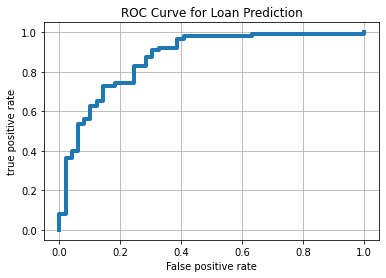

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, linewidth=4)
plt.xlabel('False positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve for Loan Prediction')
plt.grid()

In [ ]:
# Based on the ROC curve to minimize the false positives
# Anything above 78.5% should be accepted and anything below 60% should be rejected
# and the one in between them should be evaluated manualy